In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn import metrics
import os
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [27]:
# show upload dialog
from google.colab import files
uploaded = files.upload()

Saving temperature_data.csv to temperature_data (1).csv


In [28]:
import pandas as pd
df = pd.read_csv('temperature_data.csv',index_col=0)
df.head()

,To(K),Ne(K),Hu(K),Na(9),Fu(9),Da(9)
timestep,,,,,,
1,5.3,4.5,4.2,18.3,6.8,5.2
2,6.2,5.6,4.3,17.8,6.0,4.8
3,4.9,4.1,3.7,17.4,5.4,3.3
4,5.1,3.8,4.0,19.9,6.9,4.8
5,7.4,6.5,6.0,22.1,8.2,7.0


In [0]:
INPUT_feature_col = [
    "To(K)","Ne(K)","Hu(K)","Na(9)","Fu(9)","Da(9)"
    ]

In [0]:
#加えない
dataset = df[INPUT_feature_col].values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
df_ax = pd.DataFrame(dataset)
#answer = df_ax[OUTPUT_label_de].values
#answer = answer.astype('float32')

In [0]:
#標準化
"""

#noiseを加える 
array_a =  df_ax.loc[:,[0]]
array_0 = array_a.values
num = len(array_0)
array_noise=[]
num=float(num)
a = num*0.1
a = int(a)
a_1 = array_0[0] + (np.random.rand(a))

#plus_noise = array_a[0] + np.random.rand()
#print(plus_noise)
for i in range(2296):
    plus_noise = array_0[i] + np.random.rand()
    array_noise.append(plus_noise)

print(len(array_noise))
noise_ax = np.array(array_noise)
noise_ax.shape

dataset = noise_ax
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
df_ax = pd.DataFrame(dataset)
"""

'\n\n#noiseを加える \narray_a =  df_ax.loc[:,[0]]\narray_0 = array_a.values\nnum = len(array_0)\narray_noise=[]\nnum=float(num)\na = num*0.1\na = int(a)\na_1 = array_0[0] + (np.random.rand(a))\n\n#plus_noise = array_a[0] + np.random.rand()\n#print(plus_noise)\nfor i in range(2296):\n    plus_noise = array_0[i] + np.random.rand()\n    array_noise.append(plus_noise)\n\nprint(len(array_noise))\nnoise_ax = np.array(array_noise)\nnoise_ax.shape\n\ndataset = noise_ax\nscaler = MinMaxScaler()\ndataset = scaler.fit_transform(dataset)\ndf_ax = pd.DataFrame(dataset)\n'

In [0]:
df_ax

,0,1,2,3,4,5
0,0.151515,0.127036,0.129139,0.215686,0.056818,0.080139
1,0.181818,0.162866,0.132450,0.183007,0.026515,0.066202
2,0.138047,0.114007,0.112583,0.156863,0.003788,0.013937
3,0.144781,0.104235,0.122517,0.320261,0.060606,0.066202
4,0.222222,0.192182,0.188742,0.464052,0.109848,0.142857
...,...,...,...,...,...,...
353,0.329966,0.319218,0.327815,0.209150,0.181818,0.205575
354,0.245791,0.228013,0.231788,0.398693,0.162879,0.174216
355,0.202020,0.182410,0.185430,0.470588,0.109848,0.146341
356,0.202020,0.185668,0.192053,0.359477,0.143939,0.139373


In [0]:
from keras.layers import Dense, Dropout
%matplotlib inline
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

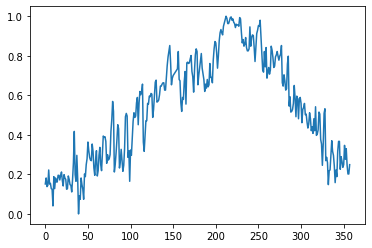

In [0]:
plt.plot(df_ax.loc[:,[0]])
plt.show()

In [0]:
rawdata = df_ax.loc[:, [0]]
raw_data = rawdata.values
raw_data = raw_data.reshape([358])
#raw_data_noise = noise_ax.reshape([358])
raw_data.shape

(358,)

In [0]:
input_data = []
output_data = []
for n in range(358-62):
    #print(n)
    input_data.append(raw_data[n:n+50])
    output_data.append(raw_data[n:n+50])

input_data = np.array(input_data)
output_data = np.array(output_data)
print(input_data.shape)
print(output_data.shape)
#raw_data = input_data + 1
#raw_data = input_data + (np.random.rand(2296 * 0.1))
#raw_data
#print(input_data)

(296, 50)
(296, 50)


In [0]:
#input_data

In [0]:
#一次元畳み込み層における入力の形状(shape)は(<シーケンス長>, <パラメータ数>)
#つまり(<連続した数値>, <次元数>)
train_X = np.reshape(input_data,  (-1, 50, 1))
train_Y = np.reshape(output_data, (-1, 50))
print(train_X.shape)
print(train_Y.shape)

(296, 50, 1)
(296, 50)


In [0]:
#学習フェーズ
"""
model = Sequential()
model.add(Conv1D(8, 5, input_shape=(50, 1), activation='relu'))
model.add(MaxPooling1D(2,padding='same'))
model.add(Conv1D(4, 5, activation='relu'))
model.add(MaxPooling1D(2,padding='same'))
model.add(Conv1D(2, 5,activation='relu'))
model.add(Conv1D(1, 2, padding='same', activation='tanh'))
#model.add(Dense(1, activation='tanh'))

#filters: 整数，出力空間の次元（つまり畳み込みにおける出力フィルタの数）．
#kernel_size: 整数か単一の整数からなるタプル/リストで，1次元の畳み込みウィンドウの長さを指定する。
model.compile(loss='mse', optimizer='adam')
"""

"\nmodel = Sequential()\nmodel.add(Conv1D(8, 5, input_shape=(50, 1), activation='relu'))\nmodel.add(MaxPooling1D(2,padding='same'))\nmodel.add(Conv1D(4, 5, activation='relu'))\nmodel.add(MaxPooling1D(2,padding='same'))\nmodel.add(Conv1D(2, 5,activation='relu'))\nmodel.add(Conv1D(1, 2, padding='same', activation='tanh'))\n#model.add(Dense(1, activation='tanh'))\n\n#filters: 整数，出力空間の次元（つまり畳み込みにおける出力フィルタの数）．\n#kernel_size: 整数か単一の整数からなるタプル/リストで，1次元の畳み込みウィンドウの長さを指定する。\nmodel.compile(loss='mse', optimizer='adam')\n"

In [0]:
#学習フェーズver.2
from keras.layers import Flatten
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5,padding='same',input_shape=(50, 1)))
model.add(MaxPooling1D(pool_size=2,padding='same'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.compile(loss='mse', optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 50, 32)            192       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               80100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
Total params: 85,342
Trainable params: 85,342
Non-trainable params: 0
_________________________________________________________________


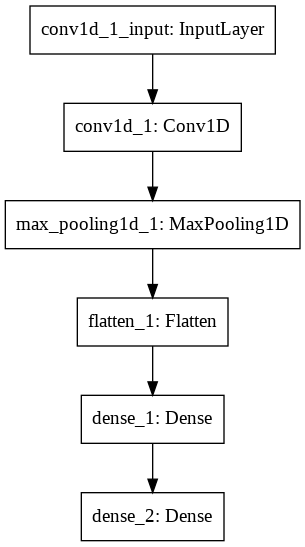

In [0]:
from keras.utils import plot_model
model.summary()
plot_model(model)

In [0]:
epochs = 500

In [0]:
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=epochs)




Train on 266 samples, validate on 30 samples
Epoch 1/500





266/266 [==============================] - 1s 3ms/step - loss: 0.2841 - val_loss: 0.1547
Epoch 2/500
266/266 [==============================] - 0s 147us/step - loss: 0.2323 - val_loss: 0.1447
Epoch 3/500
266/266 [==============================] - 0s 147us/step - loss: 0.2166 - val_loss: 0.1375
Epoch 4/500
266/266 [==============================] - 0s 131us/step - loss: 0.2021 - val_loss: 0.1323
Epoch 5/500
266/266 [==============================] - 0s 158us/step - loss: 0.1867 - val_loss: 0.1271
Epoch 6/500
266/266 [==============================] - 0s 144us/step - loss: 0.1786 - val_loss: 0.1257
Epoch 7/500
266/266 [==============================] - 0s 148us/step - loss: 0.1763 - val_loss: 0.1247
Epoch 8/500
266/266 [==============================] - 0s 142us/step - loss: 0.1758 - val_loss: 0.1241
Epoch 9/500
266/266 [==============================] - 0s 138us/step - loss: 0.1753 - val_loss: 0.1235
Epoch 10/500
266/266 [

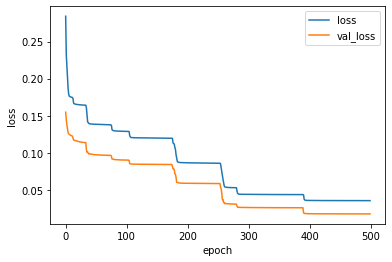

In [0]:
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()

In [0]:
from keras import backend as K
getFeature = K.function([model.get_input_at(0), K.learning_phase()],  [model.layers[3].output])
exTrain = getFeature([train_X, 0])[0]
#exTrain.shape
exTrain

array([[0.198343  , 0.26127386, 0.03102605, ..., 0.        , 0.        ,
        0.1943388 ],
       [0.11772061, 0.32278806, 0.00908257, ..., 0.        , 0.        ,
        0.06721666],
       [0.        , 0.24032378, 0.00566931, ..., 0.        , 0.        ,
        0.07887989],
       ...,
       [0.21433876, 0.18753591, 0.19050433, ..., 0.        , 0.        ,
        0.44430783],
       [0.2297535 , 0.17658721, 0.1767058 , ..., 0.        , 0.        ,
        0.32139325],
       [0.05686641, 0.20007439, 0.29819018, ..., 0.        , 0.        ,
        0.1948716 ]], dtype=float32)

In [0]:
start = 0
sheed = np.reshape(raw_data[start:start+50], (1, 50, 1))
prediction = sheed

for i in range(6):
    res = model.predict(sheed)
    res = res.reshape(1,50,1)
    sheed = np.concatenate((sheed[:,50:,:], res), axis=1)
    print(prediction.shape)
    prediction = np.concatenate((prediction, res), axis=1)


(1, 50, 1)
(1, 100, 1)
(1, 150, 1)
(1, 200, 1)
(1, 250, 1)
(1, 300, 1)


"""
start = 9100
sheed = np.reshape(raw_data[start:start+64], (1, 64, 1))
prediction = sheed

for i in range(20):
    res = model.predict(sheed)
    sheed = np.concatenate((sheed[:, 16:, :], res), axis=1)
    prediction = np.concatenate((prediction, res), axis=1)
"""

(1, 350, 1)
(350,)


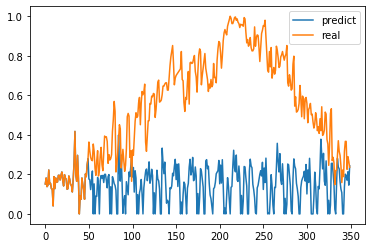

In [0]:
print(prediction.shape)
predictor = np.reshape(prediction, (-1))
print(predictor.shape)
plt.plot(range(len(predictor)), predictor, label='predict')
plt.plot(range(len(predictor)), raw_data[start:start + len(predictor)], label='real')
plt.legend() 
plt.show()

In [0]:
from keras.models import Model
test_data = train_X[0][:][:]
test_data = test_data.reshape(1,50,1)
test_data.shape
middle_model = Model(inputs=model.input, outputs=model.get_layer("dense_3").output)
#Model(inputs=入力レイヤの入力, outputs=出力レイヤの出力)
middle_output = middle_model.predict(test_data)
#dataは入力データ

In [0]:
middle_output.shape

(1, 100)

(1, 50, 1)